## **Download required libraries**

In [103]:
!pip install gensim
!pip install pyLDAvis
!pip install whatthelang
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main
!pip install googletrans==3.1.0a0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Cloning https://github.com/andrianllmm/tagalog-stemmer.git (to revision main) to /tmp/pip-req-build-k7ttmwz2
  Running command git clone --filter=blob:none --quiet https://github.com/andrianllmm/tagalog-stemmer.git /tmp/pip-req-build-k7ttmwz2
  Resolved https://github.com/andrianllmm/tagalog-stemmer.git to commit b5babfd4caebf8a8f480f8adab9f1c97f42a3baa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## **Download stopwords from nltk**

## **Import required libraries**

In [114]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

# vis
import pyLDAvis
import pyLDAvis.gensim

from googletrans import Translator

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Data preprocessing**

In [198]:
import re
from whatthelang import WhatTheLang

wtl = WhatTheLang()

# Function to classify content as 'English' or 'Taglish'
def classify_language(text):
    predicted_lang = wtl.predict_lang(text)
    if predicted_lang == 'en':
        return 'English'
    elif predicted_lang == 'tl':
        return 'Taglish'
    else:
        return 'Taglish'  # Default to Taglish

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df.drop(columns=['Platform', 'Sentiment'])

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Apply the classification to the 'Content' column
df['Predicted_Language'] = df['Content'].map(classify_language)

english_df = df[df['Predicted_Language'] == 'English']
taglish_df = df[df['Predicted_Language'] == 'Taglish']

# Count the number of English and Taglish texts
language_counts = df['Predicted_Language'].value_counts()

# Print the number of English and Taglish texts
print("Language Count:")
print(language_counts)

# Remove all columns except content since it is not needed anymore
english_df = english_df.drop(columns='Predicted_Language')
taglish_df = taglish_df.drop(columns='Predicted_Language')

# Display the first few rows of the preprocessed data
print(english_df.head())
print(taglish_df.head())

Language Count:
Predicted_Language
English    324
Taglish    188
Name: count, dtype: int64
                                             Content
0  the education system that ai will destroy will...
1  ai tool sare very helpful but you need to use ...
2  ai and teachers should join forces in a collab...
3  kids that learn how to use the ai will realize...
4  but here’s the thing if we embrace the ai how ...
                                               Content
236  ok sya nagbibigay ng idea at pang research mas...
237  kung aasa kayo sa ai to do school work kayo di...
239  nakakadismaya panahon ngayon mga kabataan ngay...
240  para sa akin i like ai to be a mainstream thin...
242  sobrang dali ng matuto ng students ngayon kami...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:46: DeprecationWarning: invalid escape sequence '\.'
<>:46: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-198-f8a65bec8e79>:46: DeprecationWarning: invalid escape sequence '\.'
  df = df.map(lambda x: re.sub('[,\.!?]', '', x))


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


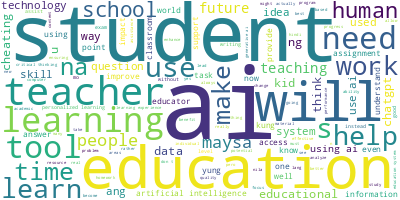

In [199]:
# ENGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(english_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


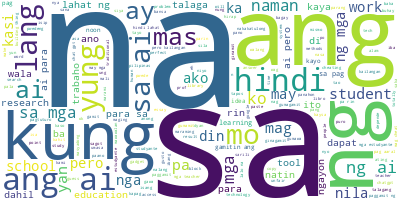

In [200]:
# TAGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(taglish_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

## **Data Preparation for LDA**

## **Lemmatization and removal of stopwords**

In [211]:
from tglstemmer import stemmer

translator = Translator()
lemmatizer = WordNetLemmatizer()

english_stop_words = set(stopwords.words('english'))
tagalog_stop_words = set()
with open('tagalog_stop_words.txt', 'r') as file:
  for line in file:
    tagalog_stop_words.add(line.strip())

# Combine English and Tagalog stop words into one set
combined_stop_words = english_stop_words.union(tagalog_stop_words)

# Function to process each document (augmentation, tokenization, stopword removal, lemmatization, stemming)
def preprocess_doc(document):
    document = ' '.join(document)
    tr_doc1 = translator.translate(document, src='auto', dest='de').text
    tr_doc2 = translator.translate(tr_doc1, src='de', dest='en').text
    tokens = gensim.utils.simple_preprocess(str(tr_doc2), deacc=True)  # Tokenization
    tokens = [token for token in tokens if token not in combined_stop_words and token not in ['english', 'taglish']]  # Stopword removal
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words]
    stemmed_tokens = [stemmer.get_stem(token) for token in tokens]  # Use stemmer for stemming
    return stemmed_tokens

# Convert the DataFrame content into a list of documents
data = df.values.tolist()

processed_data = [preprocess_doc(doc) for doc in data]

# Display the first 5 processed documents
print(processed_data[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/httpx/_config.py:156: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = ssl.SSLContext(ssl.PROTOCOL_TLS)
/usr/local/lib/python3.10/dist-packages/httpx/_config.py:159: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1
/usr/local/lib/python3.10/dist-packages/httpx/_config.py:160: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1_1


[['education', 'system', 'destroy', 'ai', 'system', 'adapt', 'change', 'world', 'ai'], ['although', 'ai', 'tool', 'helpful', 'use', 'correctly', 'replace', 'hom', 'still', 'need', 'hom', 'touch'], ['ai', 'teacher', 'join', 'force', 'joint', 'effort', 'revolutionize', 'education', 'ai', 'teacher', 'give', 'student', 'best', 'skill'], ['child', 'learn', 'use', 'ai', 'recognize', 'career', 'ai', 'make', 'obsolete', 'take', 'smarter', 'path'], ['thing', 'embrace', 'ai', 'student', 'ever', 'learn', 'form', 'opinion', 'ask', 'ai', 'form']]


## **Dictionary and corpus creation**

In [212]:
# Create Dictionary
id2word = corpora.Dictionary(processed_data)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in processed_data]

# Display Results
print(corpus[:1][0][:15])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

### **Single-core training**


In [217]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=3, id2word=id2word, passes=10, alpha='auto', eta='auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Display Topics**

In [218]:
num_topics = lda_model.num_topics

# Print each topic with its top words
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=10)  # Get top 10 words for each topic
    print(f"Topic #{topic_id}:")
    print(", ".join([f"{word} ({round(weight, 4)})" for word, weight in topic_terms]))
    print()

Topic #0:
ai (0.04560000076889992), use (0.01730000041425228), student (0.010900000110268593), education (0.010300000198185444), tool (0.010300000198185444), work (0.009499999694526196), used (0.009399999864399433), learning (0.00800000037997961), people (0.0066999997943639755), like (0.006099999882280827)

Topic #1:
ai (0.0674000009894371), student (0.03370000049471855), learning (0.022600000724196434), teacher (0.017799999564886093), education (0.013899999670684338), help (0.013700000010430813), need (0.007000000216066837), also (0.006399999838322401), tool (0.006399999838322401), learn (0.006000000052154064)

Topic #2:
ai (0.032499998807907104), student (0.023900000378489494), use (0.009399999864399433), school (0.00930000003427267), time (0.008799999952316284), education (0.007899999618530273), technology (0.006399999838322401), teacher (0.006099999882280827), need (0.006000000052154064), learn (0.005499999970197678)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [219]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.094761  0.014797       1        1  37.334988
0      0.031192 -0.072362       2        1  32.041370
2      0.063569  0.057565       3        1  30.623642, topic_info=             Term        Freq       Total Category  logprob  loglift
132      learning   99.000000   99.000000  Default  30.0000  30.0000
223  personalized   18.000000   18.000000  Default  29.0000  29.0000
25        student  195.000000  195.000000  Default  28.0000  28.0000
16            use   86.000000   86.000000  Default  27.0000  27.0000
26        teacher   83.000000   83.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
295           one   10.113012   26.404559   Topic3  -5.5335   0.2237
14           tool   11.989020   59.368456   Topic3  -5.3633  -0.4164
5          system    9.952424   26.370454   Topic3  -5.5495   0.2090
161          help   11.532781   65.741722   Topic3  -5.4021  -0.5571
92           like   10.207452   31.050300   Topic3  -5.5242   0.0709

[235 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
168       1  0.249784  ability
168       2  0.749352  ability
193       1  0.617240   access
193       2  0.185172   access
193       3  0.185172   access
...     ...       ...      ...
73        1  0.097117    write
73        2  0.097117    write
73        3  0.776936    write
110       1  0.139794     year
110       3  0.838767     year

[328 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

## **Coherence Score**

In [220]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.517196382768554


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
